# ORIE 5258 Homework 2: Calculating Optimal Minimum-Variance Portfolio Weights

#### Students: Vishakha Korde (vk369) and Luis Alonso Cendra Villalobos (lc2234)

**Stocks chosen:**

AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM

**Time series:**

Start = 9/1/2023

End = 10/30/2023

In [62]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
# creating pandas dataframe for each stock

path = '/content/drive/MyDrive/ORIE5258 - Python for Finance/HW2/'

AAPL = pd.read_csv(path + 'AAPL.csv')
AAPL.Name = 'AAPL'
AMZN = pd.read_csv(path + 'AMZN.csv')
AMZN.Name = 'AMZN'
AVGO = pd.read_csv(path + 'AVGO.csv')
AVGO.Name = 'AVGO'
BRK  = pd.read_csv(path + 'BRK.csv')
BRK.Name = 'BRK'
GOOG = pd.read_csv(path + 'GOOG.csv')
GOOG.Name = 'GOOG'
HD   = pd.read_csv(path + 'HD.csv')
HD.Name = 'HD'
JNJ  = pd.read_csv(path + 'JNJ.csv')
JNJ.Name = 'JNJ'
JPM  = pd.read_csv(path + 'JPM.csv')
JPM.Name = 'JPM'
LLY  = pd.read_csv(path + 'LLY.csv')
LLY.Name = 'LLY'
MA   = pd.read_csv(path + 'MA.csv')
MA.Name = 'MA'
META = pd.read_csv(path + 'META.csv')
META.Name = 'META'
MSFT = pd.read_csv(path + 'MSFT.csv')
MSFT.Name = 'MSFT'
NVDA = pd.read_csv(path + 'NVDA.csv')
NVDA.Name = 'NVDA'
ORCL = pd.read_csv(path + 'ORCL.csv')
ORCL.Name = 'ORCL'
PG   = pd.read_csv(path + 'PG.csv')
PG.Name = 'PG'
TSLA = pd.read_csv(path + 'TSLA.csv')
TSLA.Name = 'TSLA'
UNH  = pd.read_csv(path + 'UNH.csv')
UNH.Name = 'UNH'
V    = pd.read_csv(path + 'V.csv')
V.Name = 'V'
WMT  = pd.read_csv(path + 'WMT.csv')
WMT.Name = 'WMT'
XOM  = pd.read_csv(path + 'XOM.csv')
XOM.Name = 'XOM'

In [65]:
# List of stocks
dataframes = [AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM]

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-1) / df['Adj Close'] - 1

In [66]:
# Merge DataFrames for all asset returns
for df in dataframes:
  asset_returns = pd.concat([AAPL['Date'], AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)

# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

# Print the asset returns
print(asset_returns[:])

          Date      AAPL      AMZN      AVGO       BRK      GOOG        HD  \
0     9/1/2023  0.001267 -0.006154 -0.000401 -0.005490 -0.000658 -0.015912   
1     9/5/2023 -0.035793 -0.013914  0.000115  0.003329 -0.009802 -0.005430   
2     9/6/2023 -0.029249  0.018395 -0.017472  0.000359  0.006131  0.007423   
3     9/7/2023  0.003492  0.002757  0.000607  0.003731  0.007342  0.000883   
4     9/8/2023  0.006623  0.035231  0.001854  0.006526  0.003936 -0.001034   
5    9/11/2023 -0.017061 -0.013068 -0.017017  0.006183 -0.012124 -0.006365   
6    9/12/2023 -0.011855  0.025632  0.009958  0.000109  0.010509 -0.001226   
7    9/13/2023  0.008782 -0.000898  0.021936  0.004567  0.010836  0.011507   
8    9/14/2023 -0.004154 -0.029920 -0.022899 -0.004438 -0.004964 -0.024967   
9    9/15/2023  0.016913 -0.002920 -0.001973  0.006986  0.004772 -0.012881   
10   9/18/2023  0.006181 -0.016788 -0.000941  0.000135 -0.000936 -0.008353   
11   9/19/2023 -0.019992 -0.017002 -0.016611 -0.009879 -0.030541

In [67]:
# creating new dataframe to store the difference in returns
return_diff = pd.DataFrame()

# ASSUMPTION: considering 'AAPL' as independent variable and using the other 19 stocks as dependent variables to construct risk neutral portfolio
for i in range(2, 21):
  # calculating difference in return between AAPL and each stock
  return_diff[asset_returns.columns[i]] = asset_returns[asset_returns.columns[1]] - asset_returns[asset_returns.columns[i]]
return_diff['Date'] = asset_returns['Date']

#### Test-train split

In [68]:
# training data (September)
y_train = np.asarray(asset_returns['AAPL'].iloc[0:20])  # AAPL = N-th Asset
X_train = np.asarray(return_diff.iloc[0:20,:-1])        # Other N-1 = 19 instruments

# testing data (October)
y_test = np.asarray(asset_returns['AAPL'].iloc[20:40])  # AAPL = N-th Asset
X_test = np.asarray(return_diff.iloc[20:40,:-1])        # Other N-1 = 19 instruments

## OLS

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


reg = LinearRegression().fit(X_train, y_train)          # defining linear regression model and fit training data
R2 = reg.score(X_train, y_train)                        # R2 score
w = reg.coef_                                        # coeff of dependent variables
print('Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:')
print(w)
# ASSUMPTION: sum of coeff of 20 stocks in portfolio = 1
print('Optimal weight for AAPL is %s' % (1 - w.sum()))         # coeff of independent variable

# Make predictions using the testing data
Y_test = reg.predict(X_test)

# Calculate the MSE
mse_OLS = mean_squared_error(Y_test, y_test)
print("Mean Squared Error:", mse_OLS)
error_ols = y_test - Y_test

Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:
[-0.9788281   1.58793326  5.38312366 -0.6461551   2.30737398 -5.57753984
  1.96826782  4.49445909 -3.53519583 -1.50558779 -2.06485595  0.85187537
  0.02547746  2.92210982  0.71355491  4.0406317   2.68371525 -9.70237745
 -1.51843837]
Optimal weight for AAPL is -0.44954389073870127
Mean Squared Error: 0.027644792462741968


In [70]:
for i in range(0, 19):
  print('The error for stock %s is %s' % (return_diff.columns[i], float(y_test[i] - Y_test[i])))

The error for stock AMZN is -0.1628460706530736
The error for stock AVGO is 0.02178929437598897
The error for stock BRK is 0.250106504292171
The error for stock GOOG is 0.42226886351940024
The error for stock HD is 0.00685383104322247
The error for stock JNJ is 0.06419206346124234
The error for stock JPM is 0.22201766373462836
The error for stock LLY is 0.018905576064213912
The error for stock MA is 0.06554311279341556
The error for stock META is -0.0012637165045022419
The error for stock MSFT is -0.12506744396420383
The error for stock NVDA is 0.0835711890279688
The error for stock ORCL is -0.2520183457218433
The error for stock PG is 0.020444446884092096
The error for stock TSLA is -0.19051103490034205
The error for stock UNH is 0.14227248696752165
The error for stock V is 0.0237466752951922
The error for stock WMT is 0.1966396914205798
The error for stock XOM is -0.20394305464517068


## Ridge

In [71]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=5)           #alpha is the regularization penalty. alpha=1: linear regression
rr.fit(X_train, y_train)      # defining ridge regression model and fit training data
R2 = rr.score(X_train, y_train)     # R2 score
w = rr.coef_                  # coeff of dependent variables
print('Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:')
print(w)
# ASSUMPTION: sum of coeff of 20 stocks in portfolio = 1
print('Optimal weight for AAPL is %s' % (1 - w.sum()))         # coeff of independent variable

# Make predictions using the testing data
Y_test = rr.predict(X_test)

# Calculate the MSE
mse_ridge = mean_squared_error(Y_test, y_test)
print("Mean Squared Error:", mse_ridge)
error_ridge = y_test - Y_test

Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:
[0.00042959 0.0003911  0.00078611 0.00040802 0.00078443 0.00074483
 0.00073307 0.00087827 0.00075924 0.00034785 0.00044916 0.00025051
 0.00033928 0.00076351 0.00034731 0.00079744 0.00078525 0.00092133
 0.0008944 ]
Optimal weight for AAPL is 0.9881892854373517
Mean Squared Error: 0.0001097522741057104


In [72]:
for i in range(0, 19):
  print('The error for stock %s is %s' % (return_diff.columns[i], float(y_test[i] - Y_test[i])))

The error for stock AMZN is -0.003652726250089876
The error for stock AVGO is 0.011483241654655299
The error for stock BRK is 0.01130071288934827
The error for stock GOOG is 0.018872973769960354
The error for stock HD is 0.012581190337208503
The error for stock JNJ is 0.000942875907279872
The error for stock JPM is 0.012018675616547922
The error for stock LLY is 0.009181350649012581
The error for stock MA is -0.00597952322317318
The error for stock META is 0.0035674120798759633
The error for stock MSFT is -0.0045255478403440925
The error for stock NVDA is -0.0032270687700435936
The error for stock ORCL is 0.0019216271851200195
The error for stock PG is -0.010489199976720261
The error for stock TSLA is 0.004858409615176995
The error for stock UNH is 0.006785524950228631
The error for stock V is -0.009256984661206294
The error for stock WMT is -0.02034349803145457
The error for stock XOM is 0.011992221356423777


In [73]:
#Ridge using Linear Algebra

import numpy as np
n, m = X_train.shape
I = np.identity(m)
alpha = 5
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + alpha * I), X_train.T), y_train)

print(w)
print(w.sum())

[0.00044882 0.00043064 0.0008225  0.00046955 0.00076716 0.00078697
 0.00078605 0.00092082 0.00078894 0.00044896 0.00050284 0.00025676
 0.00031487 0.00078198 0.00044687 0.00093628 0.00079725 0.00098376
 0.00098122]
0.012672234421636678


## LASSO

In [74]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)       # defining lasso regression model
clf.fit(X_train,y_train)                  # fit training data
w = clf.coef_                             # coeff of dependent variables
print('Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:')
print(w)
# ASSUMPTION: sum of coeff of 20 stocks in portfolio = 1
print('Optimal weight for AAPL is %s' % (1 - w.sum()))         # coeff of independent variable
print('Intercept:', clf.intercept_)

# Make predictions using the testing data
Y_test = rr.predict(X_test)

# Calculate the MSE
mse_lasso = mean_squared_error(Y_test, y_test)
print("Mean Squared Error:", mse_lasso)
error_lasso = y_test - Y_test

Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal weight for AAPL is 1.0
Intercept: -0.004214971505756509
Mean Squared Error: 0.0001097522741057104


In [75]:
for i in range(0, 19):
  print('The error for stock %s is %s' % (return_diff.columns[i], float(y_test[i] - Y_test[i])))

The error for stock AMZN is -0.003652726250089876
The error for stock AVGO is 0.011483241654655299
The error for stock BRK is 0.01130071288934827
The error for stock GOOG is 0.018872973769960354
The error for stock HD is 0.012581190337208503
The error for stock JNJ is 0.000942875907279872
The error for stock JPM is 0.012018675616547922
The error for stock LLY is 0.009181350649012581
The error for stock MA is -0.00597952322317318
The error for stock META is 0.0035674120798759633
The error for stock MSFT is -0.0045255478403440925
The error for stock NVDA is -0.0032270687700435936
The error for stock ORCL is 0.0019216271851200195
The error for stock PG is -0.010489199976720261
The error for stock TSLA is 0.004858409615176995
The error for stock UNH is 0.006785524950228631
The error for stock V is -0.009256984661206294
The error for stock WMT is -0.02034349803145457
The error for stock XOM is 0.011992221356423777


## Elastic Net

In [76]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state = 0)         # defining elastic net regression model
regr.fit(X_train, y_train)                  # fit training data
w = regr.coef_                              # coeff of dependent variables
print('Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:')
print(w)
# ASSUMPTION: sum of coeff of 20 stocks in portfolio = 1
print('Optimal weight for AAPL is %s' % (1 - w.sum()))         # coeff of independent variable
print('Intercept:', regr.intercept_)

# Make predictions using the testing data
Y_test = rr.predict(X_test)

# Calculate the MSE
mse_elasticnet = mean_squared_error(Y_test, y_test)
print("Mean Squared Error:", mse_elasticnet)
error_elasticnet = y_test - Y_test

Optimal weight for AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM is:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal weight for AAPL is 1.0
Intercept: -0.004214971505756509
Mean Squared Error: 0.0001097522741057104


In [77]:
for i in range(0, 19):
  print('The error for stock %s is %s' % (return_diff.columns[i], float(y_test[i] - Y_test[i])))

The error for stock AMZN is -0.003652726250089876
The error for stock AVGO is 0.011483241654655299
The error for stock BRK is 0.01130071288934827
The error for stock GOOG is 0.018872973769960354
The error for stock HD is 0.012581190337208503
The error for stock JNJ is 0.000942875907279872
The error for stock JPM is 0.012018675616547922
The error for stock LLY is 0.009181350649012581
The error for stock MA is -0.00597952322317318
The error for stock META is 0.0035674120798759633
The error for stock MSFT is -0.0045255478403440925
The error for stock NVDA is -0.0032270687700435936
The error for stock ORCL is 0.0019216271851200195
The error for stock PG is -0.010489199976720261
The error for stock TSLA is 0.004858409615176995
The error for stock UNH is 0.006785524950228631
The error for stock V is -0.009256984661206294
The error for stock WMT is -0.02034349803145457
The error for stock XOM is 0.011992221356423777


### Plotting errors for each model

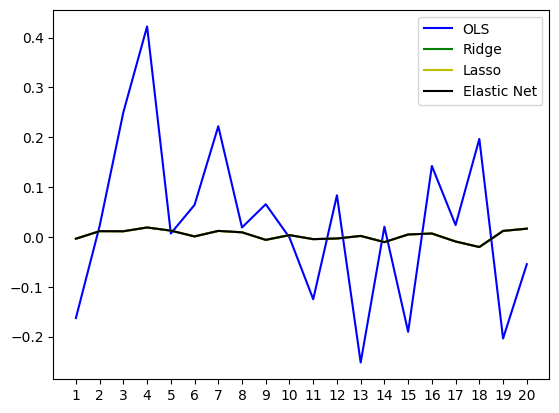

In [87]:
x = range(1, 21)
fig, ax = plt.subplots()
plt.plot(x, error_ols, 'b', x, error_ridge, 'g', x, error_lasso, 'y', x, error_elasticnet, 'black')
plt.legend(['OLS', 'Ridge', 'Lasso', 'Elastic Net'])
ax.set_xticks(x)
plt.show()

